In [1]:
# 📘 AICTE Virtual Internship – Week 1: Water Quality Prediction

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
from google.colab import files
uploaded = files.upload()

# Load dataset (semicolon-separated)
df = pd.read_csv(next(iter(uploaded)), sep=';')
df.head()



Saving afa2e701598d20110228.csv to afa2e701598d20110228.csv


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [3]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with nulls (basic Week 1 approach)
df_clean = df.dropna().reset_index(drop=True)

# Structure check
df_clean.info()

Missing values:
 id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2776 non-null   int64  
 1   date       2776 non-null   object 
 2   NH4        2776 non-null   float64
 3   BSK5       2776 non-null   float64
 4   Suspended  2776 non-null   float64
 5   O2         2776 non-null   float64
 6   NO3        2776 non-null   float64
 7   NO2        2776 non-null   float64
 8   SO4        2776 non-null   float64
 9   PO4        2776 non-null   float64
 10  CL         2776 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 238.7+ KB


In [4]:
# Transposed descriptive statistics
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2776.0,12.275216,6.074781,1.000,8.00,13.000,16.0000,22.00
NH4,2776.0,0.634033,1.830170,0.000,0.08,0.220,0.4800,30.26
BSK5,2776.0,4.247871,2.759450,0.000,2.12,3.745,5.7000,27.12
Suspended,2776.0,12.884968,16.661469,0.000,6.00,10.000,14.4000,595.00
O2,2776.0,9.553639,4.455139,0.000,7.10,9.000,11.6450,90.00
NO3,2776.0,4.349250,6.958223,0.000,1.40,2.820,5.6000,133.40
NO2,2776.0,0.224438,2.159287,0.000,0.03,0.057,0.1200,109.00
SO4,2776.0,59.711366,97.138548,0.003,27.10,37.850,65.2800,3573.40
PO4,2776.0,0.393413,0.641045,0.000,0.13,0.270,0.4600,11.66
CL,2776.0,94.499423,396.997205,8.500,26.80,33.900,45.8425,5615.28


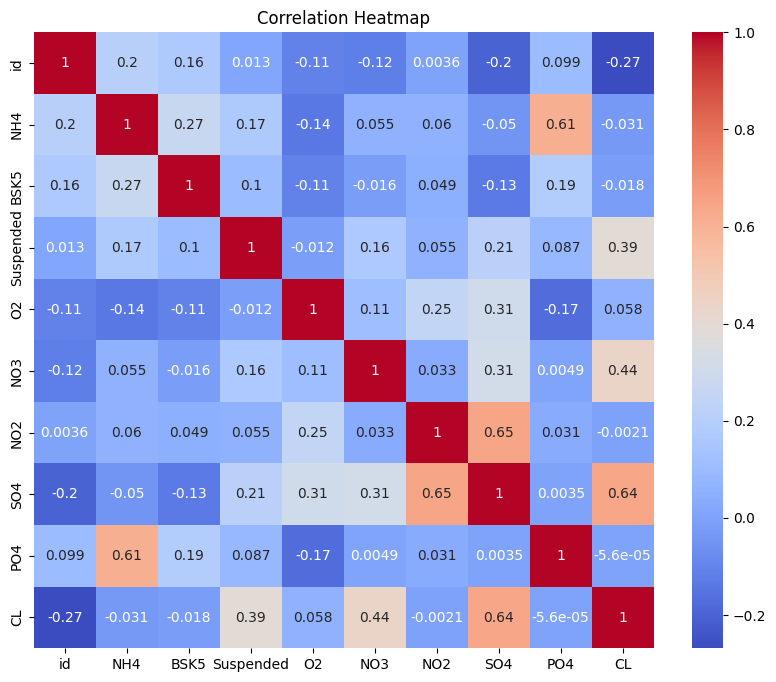

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Input: Only 'id' used for now
X = df_clean[['id']]

# Outputs
y = df_clean[['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define & fit model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [7]:
y_pred = model.predict(X_test)

# R² and MSE
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Display for each target
print("Performance on Test Data:\n")
for i, col in enumerate(y.columns):
    print(f"{col}: R² = {r2[i]:.4f}, MSE = {mse[i]:.4f}")

Performance on Test Data:

NH4: R² = 0.3861, MSE = 2.4653
BSK5: R² = 0.2701, MSE = 4.7913
Suspended: R² = 0.2828, MSE = 88.5592
O2: R² = 0.1175, MSE = 13.0165
NO3: R² = 0.3010, MSE = 27.6710
NO2: R² = -0.1684, MSE = 0.2041
SO4: R² = 0.7952, MSE = 844.8064
PO4: R² = 0.1145, MSE = 0.3829
CL: R² = 0.7977, MSE = 26706.4794


In [8]:
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [9]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28


In [11]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
43,1,2010-12-01,0.291,3.27,16.7,12.30,59.20,0.090,278.40,0.370,1375.46
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
41,1,2010-06-02,0.290,3.52,37.2,7.16,57.87,0.210,268.80,0.240,1120.20
22,1,2005-09-02,0.000,3.68,28.5,14.20,15.51,0.033,422.40,0.900,2063.80
62,1,2015-09-02,0.035,6.28,104.8,7.80,4.68,0.076,694.40,0.530,5615.28
...,...,...,...,...,...,...,...,...,...,...,...
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2835,22,2019-01-28,0.044,0.94,1.6,12.85,7.28,0.032,103.04,0.448,60.33
2684,22,2006-08-28,0.037,1.55,22.3,8.12,2.04,0.029,109.20,0.500,54.04
2685,22,2006-09-28,0.061,1.26,1.6,6.75,3.65,0.025,69.60,0.480,41.10


In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [14]:
df.head()


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
43,1,2010-12-01,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001,3
41,1,2010-06-02,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010,6
22,1,2005-09-02,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005,9
62,1,2015-09-02,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015,9


In [16]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [21]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [22]:
# drop the missing values - dropna()
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
43,1,2010-12-01,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001,3
41,1,2010-06-02,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010,6
22,1,2005-09-02,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005,9
62,1,2015-09-02,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015,9


In [23]:
df.isnull().sum()

,0
id,0
date,0
NH4,2
BSK5,0
Suspended,2
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [24]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [25]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [26]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [27]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 25.88422310540883
   R2: 0.06520417340923867

NO3:
   MSE: 14.727348304672297
   R2: 0.44260327532253096

NO2:
   MSE: 1.4643439992547695
   R2: -8.26651589628579

SO4:
   MSE: 917.9186820279593
   R2: 0.736095464094962

PO4:
   MSE: 0.35045226184886474
   R2: -1.613501897966842

CL:
   MSE: 29423.526310097634
   R2: 0.653554316523713



In [30]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 14.00
  NO3: 5.72
  NO2: 0.04
  SO4: 132.33
  PO4: 0.50
  CL: 65.72


In [31]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
